In [1]:
import os
import os.path as osp

import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Choose two image planes

In [2]:
IMG_DIR = "./imgs/custom/"

In [7]:
# Show imgs
files = [ osp.join(IMG_DIR, f) for f in os.listdir(IMG_DIR) ]

nrows = 2
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4))

for i in range(nrows):
    for j in range(ncols):
        fname = files[i*nrows+j]
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i][j].set_title(fname)
        axes[i][j].imshow(img)
        axes[i][j].set_axis_off()
        
plt.tight_layout()

In [8]:
file1 = "./imgs/custom/1.jpg"
file2 = "./imgs/custom/3.jpg"

In [15]:
img_dst = cv2.cvtColor(cv2.imread(file1), cv2.COLOR_BGR2RGB)
img_src = cv2.cvtColor(cv2.imread(file2), cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))

axes[0].set_title("Source")
axes[0].imshow(img_src)
axes[0].set_axis_off()

axes[1].set_title("Destination")
axes[1].imshow(img_dst)
axes[1].set_axis_off()

plt.tight_layout()

# Find 4 corresponding points

In [16]:
PATTERN_SIZE = (9, 6)

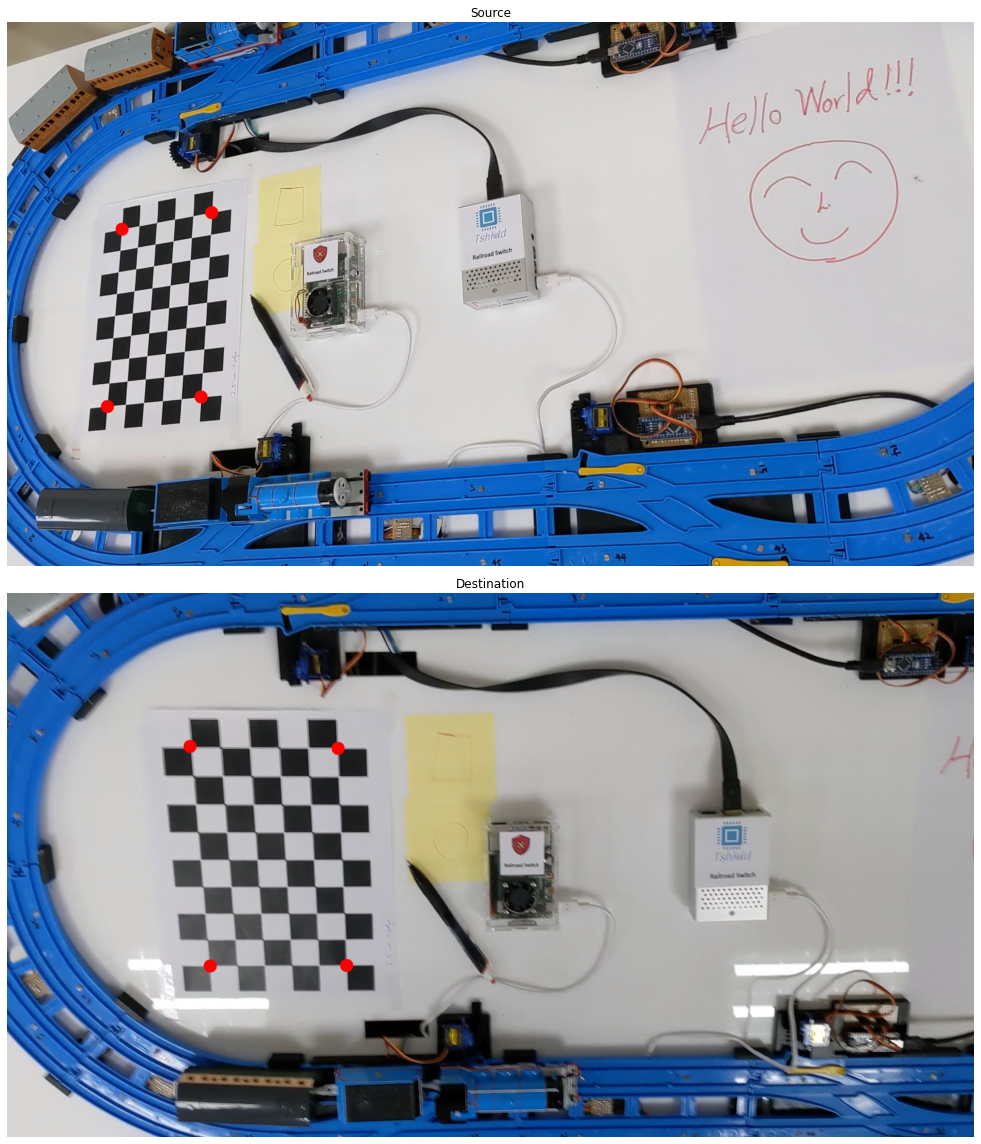

In [64]:
found, src_corners = cv2.findChessboardCorners(img_src, PATTERN_SIZE)
found, dst_corners = cv2.findChessboardCorners(img_dst, PATTERN_SIZE)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))

src_pts = src_corners[[0, 8, 45, 53]].astype(np.int32)
img_src_corner = cv2.polylines(img_src.copy(), src_pts, True, color=(255, 0, 0), thickness=25)
axes[0].set_title("Source")
axes[0].imshow(img_src_corner)
axes[0].set_axis_off()

dst_pts = dst_corners[[0, 8, 45, 53]].astype(np.int32)
img_dst_corner = cv2.polylines(img_dst.copy(), dst_pts, True, color=(255, 0, 0), thickness=25)
axes[1].set_title("Destination")
axes[1].imshow(img_dst_corner)
axes[1].set_axis_off()

plt.tight_layout()

In [67]:
H, _ = cv2.findHomography(src_pts, dst_pts)

print(H)

[[ 2.62262188e+00  5.84972644e-01 -3.46061567e+02]
 [ 5.51951394e-01  2.11977170e+00 -5.84770057e+02]
 [ 5.23961611e-04  5.76131712e-04  1.00000000e+00]]


In [72]:
canvas = cv2.warpPerspective(img_src, H, img_src.shape[:2][::-1])

plt.figure(figsize=(16, 8))
plt.imshow(canvas)

In [87]:
result = cv2.addWeighted(img_dst, 0.4, canvas, 0.6, 0)

plt.figure(figsize=(16, 8))
plt.imshow(result)